In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set()

C:\Users\Thivyan\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Extraction

In [2]:
train_data = pd.read_excel(r"D:\Computer courses\Internship project\My_Projects\Flight_Fare_Prediction\Data_Train.xlsx")

In [3]:
test_data = pd.read_excel(r"D:\Computer courses\Internship project\My_Projects\Flight_Fare_Prediction\Test_set.xlsx")

In [4]:
pd.set_option('display.max_columns', None)

## Train Data

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
train_data.Duration.count()

10683

# Data Preprocessing
* Null value removal

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# Exploratory Data Analysis

### First consider Date_of_Journey
The field is in string datatype which we have to convert to datetime datatype

In [13]:
train_data['Journey_Day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day

In [14]:
train_data['Journey_Month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month

In [15]:
train_data['Journey_Year'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.year

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


### Since we have created separate fields for Date, Month, Year, we don't require Date_of_Journey field.

In [17]:
train_data.drop('Date_of_Journey', axis=1, inplace=True)

### Similarlt converting Dep_Time, Arrival_Time, Duration to datetime datatypes

#### Dep_Time

In [18]:
train_data['Dep_Hrs'] = pd.to_datetime(train_data.Dep_Time).dt.hour
train_data['Dep_Mins'] = pd.to_datetime(train_data.Dep_Time).dt.minute

### Arrival_Time

In [19]:
train_data['Arvl_Hrs'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arvl_Mins'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

### Duration
Some duration doesn't have mins or hrs. so we have to include the missing placeholders in their respective places.

In [20]:
duration = list(train_data.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [21]:
train_data["Duration_hours"] = duration_hrs
train_data["Duration_mins"] = duration_mins

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [23]:
train_data.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_Day',
       'Journey_Month', 'Journey_Year', 'Dep_Hrs', 'Dep_Mins', 'Arvl_Hrs',
       'Arvl_Mins', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [24]:
train_data.drop(['Dep_Time', 'Arrival_Time', 'Duration'], axis=1, inplace=True)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   Journey_Day      10682 non-null  int64 
 8   Journey_Month    10682 non-null  int64 
 9   Journey_Year     10682 non-null  int64 
 10  Dep_Hrs          10682 non-null  int64 
 11  Dep_Mins         10682 non-null  int64 
 12  Arvl_Hrs         10682 non-null  int64 
 13  Arvl_Mins        10682 non-null  int64 
 14  Duration_hours   10682 non-null  int64 
 15  Duration_mins    10682 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 1.4+ MB


### Categorical data

In [26]:
for i in train_data.columns:
    print(i)
    print(train_data[i].value_counts())
    print('-'*50)

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
--------------------------------------------------
Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
--------------------------------------------------
Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
--------------------------------------------------
Route
DEL → BOM → COK          2376


### Airline vs Price

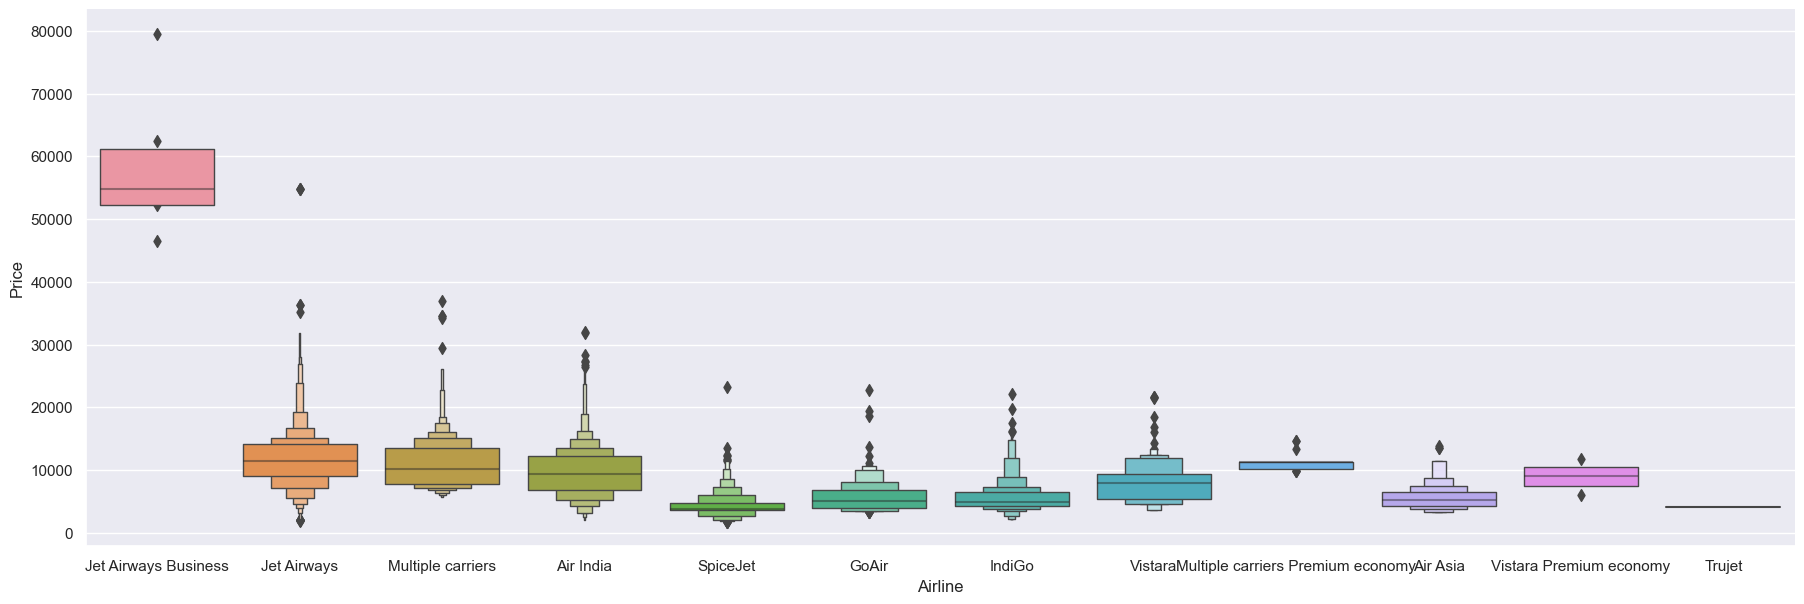

In [27]:
sns.catplot(x='Airline', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

#### Airline is a nominal categorical data - one hot encoding

In [28]:
Airline = train_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


#### Source vs Price

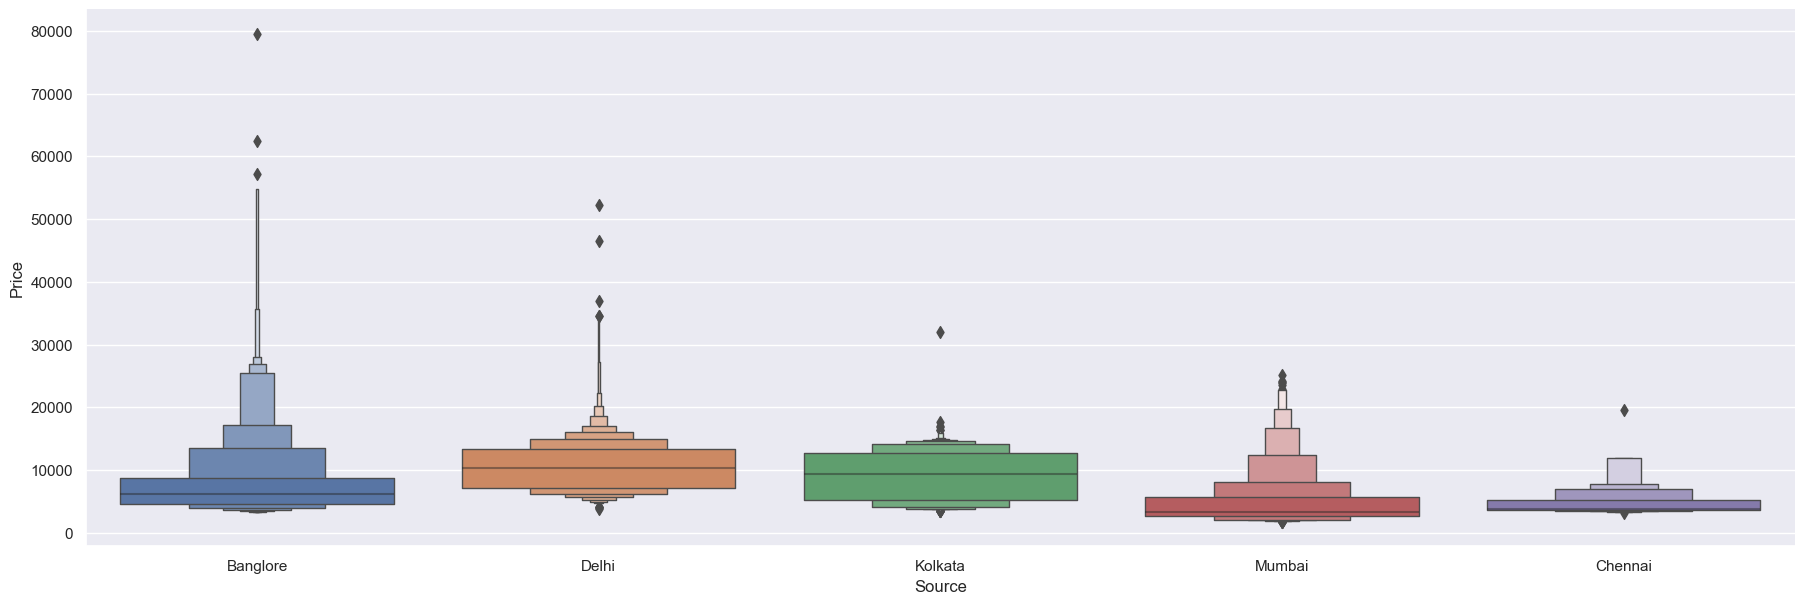

In [29]:
sns.catplot(x='Source', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

#### Source is a nominal categorical value, OHE

In [30]:
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


#### Destination vs Price

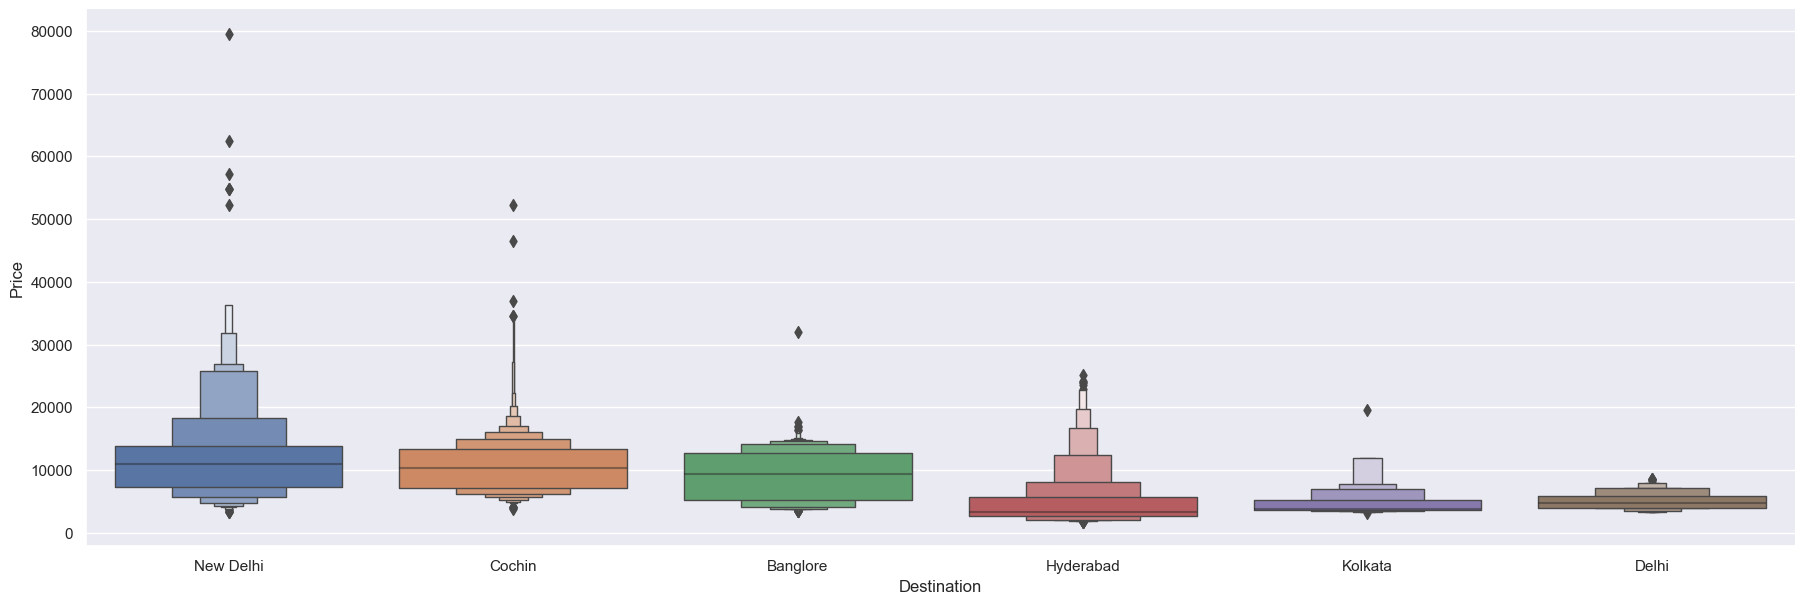

In [31]:
sns.catplot(x='Destination', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

### Destination is a nominal categorical value, OHE

In [32]:
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


1. Route & Total_Stops are related to each other.
2. Additional_Info has very less data to infer
3. Droping Route & Additional_Info

In [33]:
train_data.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

In [34]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,2019,16,50,21,35,4,45


#### Total_Stops vs Price

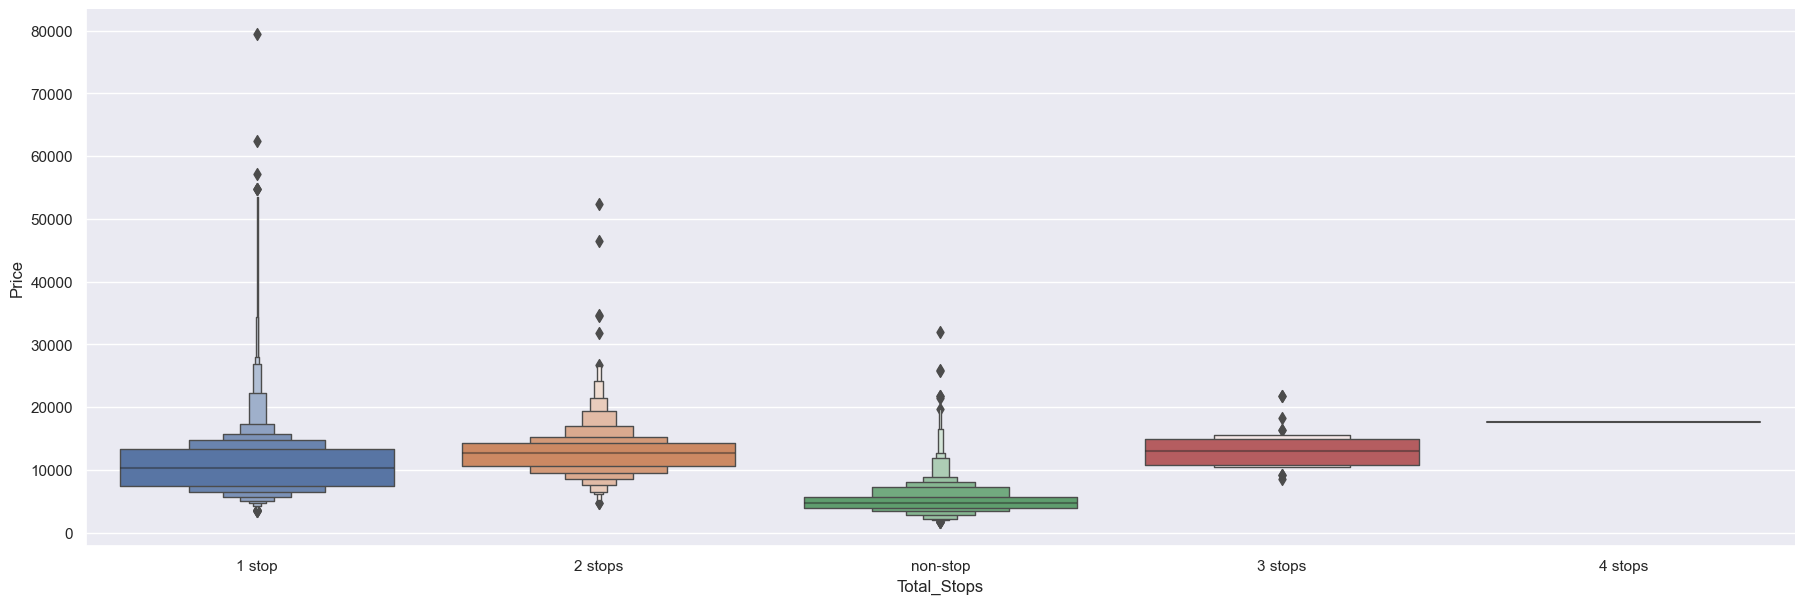

In [35]:
sns.catplot(x='Total_Stops', y='Price', data=train_data.sort_values('Price', ascending=False), kind='boxen', height=6, aspect=3)
plt.show()

#### Total_Stops is an ordinal categorical column - Label encoder/replace

In [36]:
train_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

In [37]:
train_data.Total_Stops.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Concatenate dataframe => train_data + Airline + Source+ Destination

In [38]:
data_train = pd.concat([train_data, Airline, Source, Destination], axis=1)

In [39]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Journey_Year,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
data_train.drop(['Airline', 'Source', 'Destination', 'Journey_Year'], axis=1, inplace=True)

In [41]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape

(10682, 30)

## Test Data

In [43]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Null value removal

In [44]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

### Data Preprocessing

In [45]:
# Date_of_Journey
test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.day

test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.month

# test_data['Journey_Year'] = pd.to_datetime(test_data.Date_of_Journey, format='%d/%m/%Y').dt.year

# Dep_Time
test_data['Dep_Hrs'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_Mins'] = pd.to_datetime(test_data.Dep_Time).dt.minute

# Arrival_Time
test_data['Arvl_Hrs'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arvl_Mins'] = pd.to_datetime(test_data.Arrival_Time).dt.minute

# Duration
duration = list(test_data.Duration)

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hrs = []
duration_mins = []

for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))

test_data["Duration_hours"] = duration_hrs
test_data["Duration_mins"] = duration_mins

test_data.drop(['Dep_Time', 'Arrival_Time', 'Duration', 'Date_of_Journey', 'Route', 'Additional_Info'], axis=1, inplace=True)

# Airline
Airline = test_data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)

# Source
Source = test_data[['Source']]
Source = pd.get_dummies(Source, drop_first=True)

# Destination
Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first=True)

# Total_Stops
test_data.replace({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}, inplace=True)

# Combining above 3 into test data
data_test = pd.concat([test_data, Airline, Source, Destination], axis=1)

# Dropping unnecessary data columns
data_test.drop(['Airline', 'Source', 'Destination'], axis=1, inplace=True)

test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_Day,Journey_Month,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [46]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Feature Selection

In [47]:
X = data_train.drop(['Price'], axis=1)
y = data_train.Price

In [48]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hrs,Dep_Mins,Arvl_Hrs,Arvl_Mins,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Heatmap

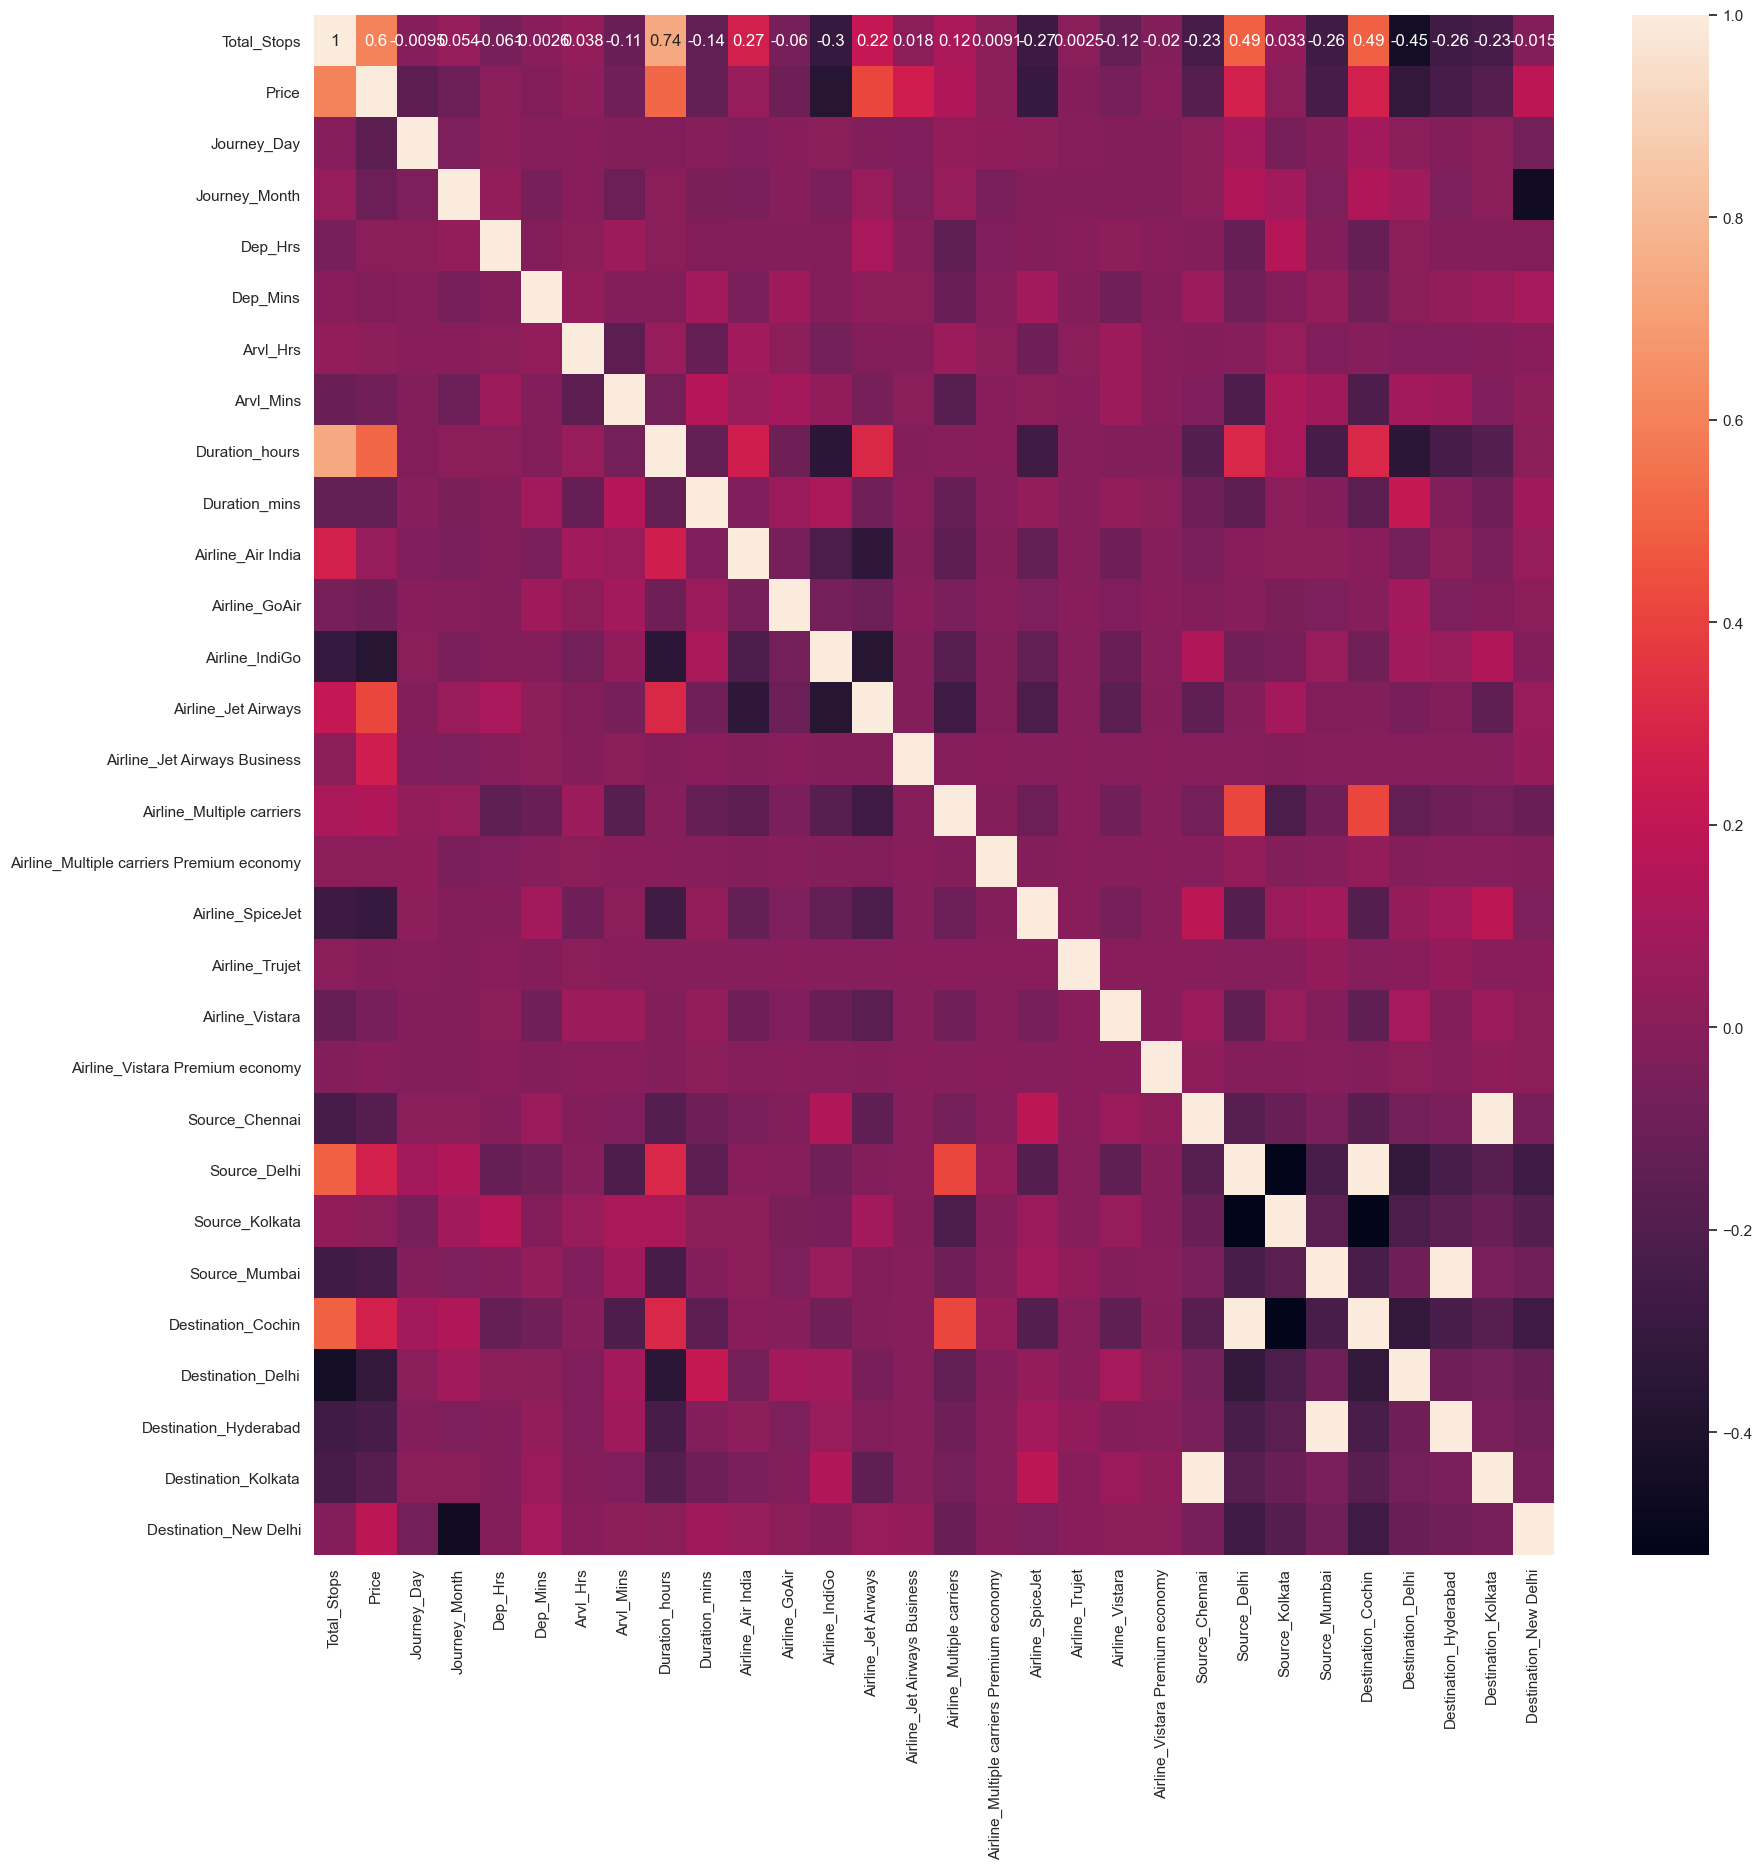

In [50]:
corr = data_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True)
plt.show()

In [51]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor()

In [52]:
print(selection.feature_importances_)

[2.38463201e-01 1.43308092e-01 5.41580443e-02 2.39378182e-02
 2.08168447e-02 2.82167332e-02 1.79625764e-02 1.31618193e-01
 1.77681463e-02 9.33165310e-03 1.89820337e-03 1.75786827e-02
 1.30194243e-01 6.68557910e-02 1.92837820e-02 8.66845995e-04
 3.07483560e-03 1.06882633e-04 5.15178220e-03 8.04627123e-05
 4.79113265e-04 8.25483650e-03 3.42339288e-03 6.74872328e-03
 9.81229552e-03 1.01494993e-02 5.22858389e-03 5.86193581e-04
 2.46445488e-02]


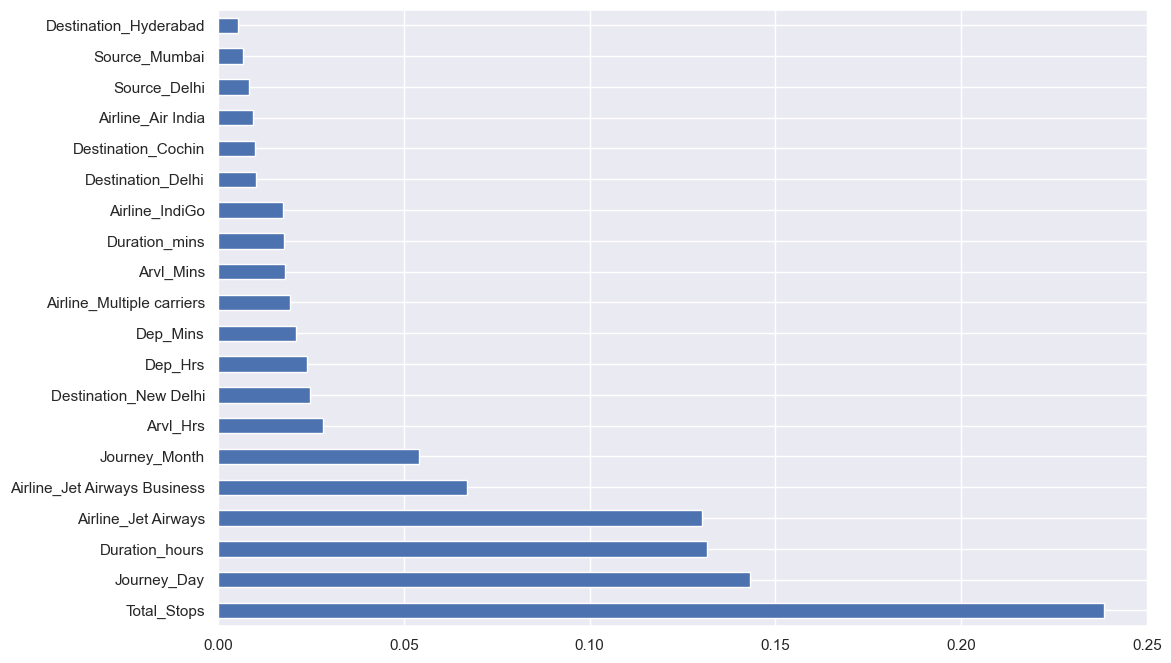

In [53]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Model Selection

In [54]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(X,y, test_size=0.2, random_state=10)

In [55]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [56]:
ypred = model.predict(xtest)

In [57]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
print('R2 : ', r2_score(ytest, ypred))
print('MSE : ', mean_squared_error(ytest, ypred))
print('Mean_Absolute_Error : ', mean_absolute_error(ytest, ypred))
print('Root_mean_square : ', np.sqrt(mean_squared_error(ytest, ypred)))

R2 :  0.801251873966199
MSE :  4294898.464093695
Mean_Absolute_Error :  1208.9868083287924
Root_mean_square :  2072.41368073406


In [59]:
n = len(ypred)
p = len(xtest.columns)
r2 = r2_score(ytest, ypred)

In [60]:
adj_r2 = (1 - ((1 - r2) * (n-p)) / (n-p-1))
print('adj_r2 : ', adj_r2)

adj_r2 :  0.8011575464265531


In [61]:
model.score(xtrain, ytrain)

0.9549645361935337

In [62]:
model.score(xtest, ytest)

0.801251873966199

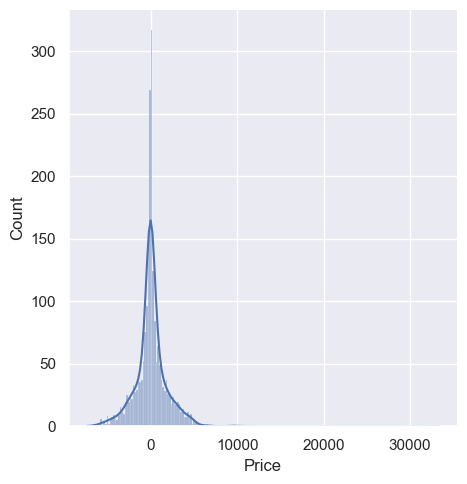

In [63]:
sns.displot(ytest-ypred, kde=True)
plt.show()

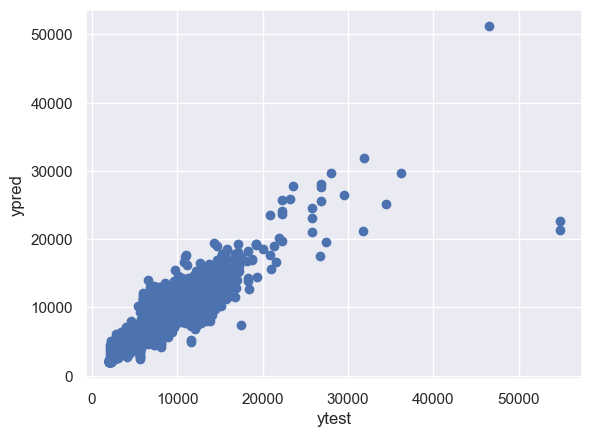

In [64]:
plt.scatter(x=ytest, y=ypred)
plt.xlabel('ytest')
plt.ylabel('ypred')
plt.show()

# HyperParameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [68]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [69]:
rf_random.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [71]:
prediction = rf_random.predict(xtest)

In [72]:
print('R2 : ', r2_score(ytest, prediction))
print('MSE : ', mean_squared_error(ytest, prediction))
print('Mean_Absolute_Error : ', mean_absolute_error(ytest, prediction))
print('Root_mean_square : ', np.sqrt(mean_squared_error(ytest, prediction)))

R2 :  0.7805379428042738
MSE :  4742521.457618499
Mean_Absolute_Error :  1285.9107266137257
Root_mean_square :  2177.733100638942


<Figure size 800x800 with 0 Axes>

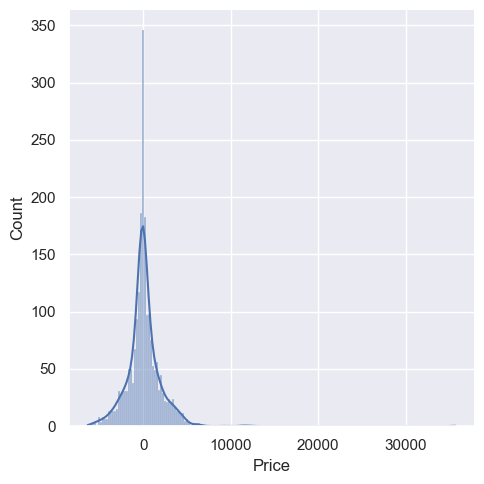

In [73]:
plt.figure(figsize = (8,8))
sns.displot(ytest-prediction, kde=True)
plt.show()

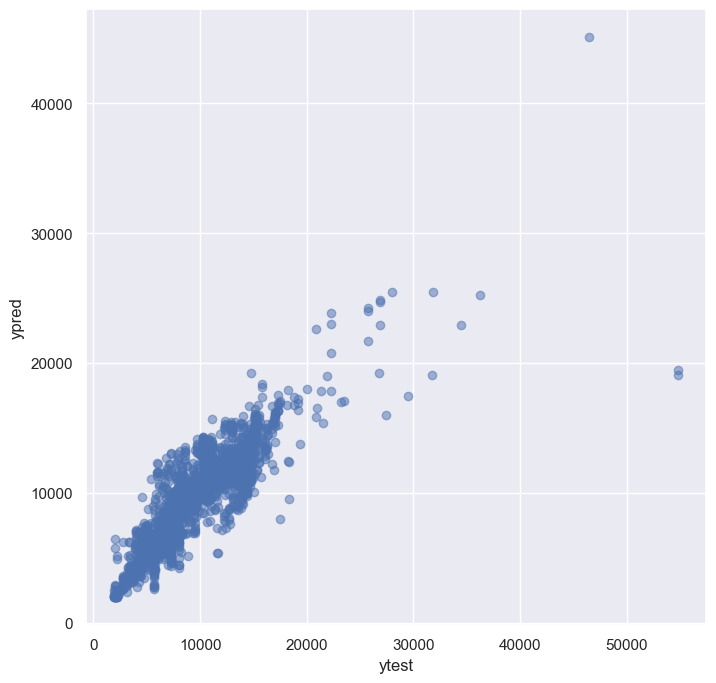

In [74]:
plt.figure(figsize = (8,8))
plt.scatter(ytest, prediction, alpha = 0.5)
plt.xlabel("ytest")
plt.ylabel("ypred")
plt.show()

# Save the model

In [75]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [76]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [77]:
y_prediction = forest.predict(xtest)
r2_score(ytest, ypred)

0.801251873966199